In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt

from evaluation_metrics import get_file_and_dirnames, get_token_flags, pitch_class_transition_matrix, note_length_transition_matrix
from evaluation_metrics import get_metrics_for_multiple_sequences, summarize_evaluation_sequences

PATH_VOCAB = "../0_data/5_vocabs"
PATH_DATA = "../0_data/6_word_data"
PATH_MODELS = "../0_data/7_models"
PATH_MODELS_CONFIG = "../0_data/7_models/config"
PATH_PRED = "../0_data/8_predictions"
PATH_TOKENS = "../0_data/8_predictions/tokens"
PATH_MIDI = "../0_data/8_predictions/midi"

In [2]:
vocab_configs = {
    "a1" : {
        "pitch_range": 128,
        "duration_steps": 64,
        "triole_tokens": False,
        "key": "all",
    },
    "a2" : {
        "pitch_range": 128,
        "duration_steps": 64,
        "triole_tokens": True,
        "key": "all",
    },
    "a3" : {
        "pitch_range": 128,
        "duration_steps": 32,
        "triole_tokens": False,
        "key": "all",
    },
    "b" : {
        "pitch_range": 128,
        "duration_steps": 64,
        "triole_tokens": False,
        "key": "C",
    },
    "c" : {
        "pitch_range": 36,
        "duration_steps": 64,
        "triole_tokens": False,
        "key": "all",
    },
    "d" : {
        "pitch_range": 36,
        "duration_steps": 32,
        "triole_tokens": True,
        "key": "C",
    }
}

In [3]:
model_df = pd.read_excel(f"{PATH_MODELS}/model_stats.xlsx", index_col="Unnamed: 0")
model_df

,name,max_length,emb_dim,attention_heads,layers,dropout,learning_rate,epochs,batch_size,ran,runtime,runtime_min,min_loss,at_epoch,incorrect_notes,correct_notes,correct_rate
0,1_short_small_50,256,128,2,3,0.01,0.001,50,4,yes,185.6872,3.09,1.163706,50,0.0,65.8,1.00
1,2_short_medium_50,256,256,4,6,0.01,0.001,50,4,yes,286.7629,4.78,1.251897,24,0.2,70.4,1.00
2,3_short_large_50,256,512,8,12,0.01,0.001,50,4,yes,568.0452,9.47,1.973589,50,0.0,74.6,1.00
3,4_middle_small_50,1024,128,2,3,0.01,0.001,50,4,yes,248.7667,4.15,1.087204,50,0.0,264.8,1.00
4,5_middle_medium_50,1024,256,4,6,0.01,0.001,50,4,yes,628.1603,10.47,1.120312,40,0.2,265.6,1.00
5,6_middle_large_50,1024,512,8,12,0.01,0.001,50,4,yes,2247.7578,37.46,1.872430,48,0.4,289.8,1.00
6,7_long_small_50,2048,128,2,3,0.01,0.001,50,4,yes,491.8461,8.20,1.202734,50,1.6,546.8,1.00
7,8_long_medium_50,2048,256,4,6,0.01,0.001,50,4,yes,1506.3536,25.11,1.154148,37,2.8,526.8,0.99
8,9_long_large_50,2048,512,8,12,0.01,0.001,50,4,yes,5933.9392,98.90,1.284094,50,0.2,552.2,1.00


In [4]:
metric_dic = {}

for index, row in model_df.iterrows():
    # only models that ran
    if row["ran"] == "no" or row["runtime"] == "too big - cuda error":
        continue

    model_name = row["name"]
    
    with open(f"{PATH_TOKENS}/{model_name}.json", "r") as fp:
        tokens = json.load(fp)
    token_data = tokens["data"]

    token_flags = get_token_flags(vocab_configs["d"])

    seq_metrics = get_metrics_for_multiple_sequences(token_data, token_flags)
    metrics = summarize_evaluation_sequences(seq_metrics)
    metric_dic[model_name] = metrics
    
metric_df = pd.DataFrame(metric_dic)
metric_df

,1_short_small_50,2_short_medium_50,3_short_large_50,4_middle_small_50,5_middle_medium_50,6_middle_large_50,7_long_small_50,8_long_medium_50,9_long_large_50
pitch_count_seq,8.8,6.8,13.2,11.8,10.8,14.8,14.4,13.2,18.0
pitch_count_bar,3.4,3.19,4.07,3.09,3.5,3.52,3.4,2.78,3.61
pitch_range_seq,14.6,14.0,24.0,20.8,19.4,20.4,22.4,20.0,25.4
pitch_range_bar,5.52,5.69,10.25,5.37,6.5,7.31,6.25,5.07,6.6
pitch_intervals_avg,0.07,0.06,0.05,0.03,0.01,0.02,0.0,0.0,0.01
pitch_intervals_avg_abs,2.17,2.19,5.48,2.25,2.52,4.54,2.88,2.76,2.77
pitch_intervals_hist,"[80, 35, 126, 32, 10, 23, 0, 12, 0, 6, 1, 0, 1...","[93, 16, 134, 53, 15, 20, 0, 11, 2, 4, 1, 0, 3...","[49, 8, 54, 31, 27, 57, 0, 46, 10, 27, 18, 4, ...","[358, 57, 456, 205, 61, 116, 0, 35, 8, 10, 9, ...","[282, 20, 543, 258, 23, 97, 0, 55, 9, 11, 7, 2...","[197, 37, 255, 163, 105, 226, 14, 209, 44, 77,...","[603, 157, 785, 375, 177, 309, 1, 180, 22, 57,...","[634, 49, 886, 435, 101, 240, 2, 171, 20, 39, ...","[624, 214, 803, 353, 183, 285, 13, 133, 24, 44..."
pitch_class_hist_numbers,"[66, 0, 59, 0, 52, 19, 0, 66, 0, 44, 0, 25]","[55, 0, 67, 0, 91, 13, 0, 65, 0, 62, 0, 4]","[67, 0, 66, 0, 85, 10, 0, 69, 0, 55, 0, 22]","[256, 3, 247, 0, 214, 4, 2, 206, 0, 287, 0, 107]","[183, 0, 260, 0, 264, 1, 0, 256, 0, 320, 0, 46]","[266, 2, 270, 2, 279, 55, 4, 255, 2, 238, 2, 76]","[502, 5, 533, 1, 490, 47, 50, 394, 0, 476, 0, ...","[362, 103, 520, 59, 458, 61, 8, 393, 81, 447, ...","[515, 15, 573, 20, 568, 114, 11, 362, 10, 403,..."
pitch_class_hist_pitches,"{'C': 66, 'C#': 0, 'D': 59, 'D#': 0, 'E': 52, ...","{'C': 55, 'C#': 0, 'D': 67, 'D#': 0, 'E': 91, ...","{'C': 67, 'C#': 0, 'D': 66, 'D#': 0, 'E': 85, ...","{'C': 256, 'C#': 3, 'D': 247, 'D#': 0, 'E': 21...","{'C': 183, 'C#': 0, 'D': 260, 'D#': 0, 'E': 26...","{'C': 266, 'C#': 2, 'D': 270, 'D#': 2, 'E': 27...","{'C': 502, 'C#': 5, 'D': 533, 'D#': 1, 'E': 49...","{'C': 362, 'C#': 103, 'D': 520, 'D#': 59, 'E':...","{'C': 515, 'C#': 15, 'D': 573, 'D#': 20, 'E': ..."
crooked_pitch_count,0.0,0.0,0.0,1.0,0.0,2.4,11.2,67.8,12.8


In [5]:
metric_df.to_excel(f"{PATH_PRED}/model_evaluation.xlsx")

In [6]:
metric_original_data_dic = {}

for key in vocab_configs.keys():
    
    path = f"{PATH_DATA}/{key}_token_data.json"
    
    with open(path, "r") as fp:
        tokens = json.load(fp)
    token_data = [tokens[key] for key in tokens.keys()]

    token_flags = get_token_flags(vocab_configs[key])
    
    seq_metrics = get_metrics_for_multiple_sequences(token_data, token_flags)
    metrics = summarize_evaluation_sequences(seq_metrics)
    metric_original_data_dic[key] = metrics
    
metric_original_data_df = pd.DataFrame(metric_original_data_dic)
metric_original_data_df

,a1,a2,a3,b,c,d
pitch_count_seq,11.45,11.45,11.45,11.31,11.19,11.04
pitch_count_bar,3.44,3.44,3.43,3.44,3.43,3.41
pitch_range_seq,18.49,18.49,18.49,18.5,17.99,17.98
pitch_range_bar,6.05,6.05,6.03,6.05,6.03,6.0
pitch_intervals_avg,0.01,0.01,0.01,0.01,0.01,0.01
pitch_intervals_avg_abs,2.4,2.4,2.38,2.4,2.39,2.39
pitch_intervals_hist,"[72599, 24891, 109685, 42472, 11620, 20318, 17...","[72599, 24891, 109685, 42472, 11620, 20318, 17...","[73971, 24890, 109687, 42472, 11621, 20319, 17...","[66573, 23161, 102725, 39778, 10810, 18821, 16...","[69361, 23377, 104381, 40565, 10902, 19328, 16...","[65103, 21371, 96282, 38016, 10573, 18469, 172..."
pitch_class_hist_numbers,"[26990, 22659, 28748, 24545, 27367, 25823, 237...","[26990, 22659, 28748, 24545, 27367, 25823, 237...","[27138, 22757, 28886, 24619, 27493, 25901, 238...","[52432, 1068, 49650, 912, 55359, 11314, 1268, ...","[25712, 21412, 27214, 23076, 26326, 24545, 226...","[49849, 948, 47530, 811, 52734, 10590, 1211, 4..."
pitch_class_hist_pitches,"{'C': 26990, 'C#': 22659, 'D': 28748, 'D#': 24...","{'C': 26990, 'C#': 22659, 'D': 28748, 'D#': 24...","{'C': 27138, 'C#': 22757, 'D': 28886, 'D#': 24...","{'C': 52432, 'C#': 1068, 'D': 49650, 'D#': 912...","{'C': 25712, 'C#': 21412, 'D': 27214, 'D#': 23...","{'C': 49849, 'C#': 948, 'D': 47530, 'D#': 811,..."
crooked_pitch_count,127.89,127.89,128.47,6.18,127.06,5.95


In [7]:
metric_df.to_excel(f"{PATH_PRED}/original_data_evaluation.xlsx")

## Test metrics

In [38]:
"""

from music21 import converter, midi, key

midi_score = converter.parse(f"../0_data/4_preprocessed_sets/a)_4_4_metric_120_bpm/17_POP909-Dataset-master/111.mid")
music_analysis = midi_score.analyze('key')

df = pd.DataFrame()
for f in tqdm(files):
    if f[-4:] != ".mid":
        continue
    
    music_analysis = midi_score.analyze('key')
    row = {
        "name": f,
        "key": music_analysis,
        "confidence": music_analysis.correlationCoefficient
    }
    df = df.append(row, ignore_index=True)
df.to_csv(f"{PATH_TRANSPOSED}/{dir}_key_analysis.csv")
df"""

'df = pd.DataFrame()\nfor f in tqdm(files):\n    if f[-4:] != ".mid":\n        continue\n    \n    music_analysis = midi_score.analyze(\'key\')\n    row = {\n        "name": f,\n        "key": music_analysis,\n        "confidence": music_analysis.correlationCoefficient\n    }\n    df = df.append(row, ignore_index=True)\ndf.to_csv(f"{PATH_TRANSPOSED}/{dir}_key_analysis.csv")\ndf'

In [62]:
token_files, _ = get_file_and_dirnames(PATH_TOKENS)
_, midi_dirs = get_file_and_dirnames(PATH_MIDI)

example_token_file = token_files[8]
with open(f"{PATH_TOKENS}/{example_token_file}", 'r') as fp:
    tokens = json.load(fp)
token_data = tokens["data"]
print(len(token_data))

#midi_dirs.sort()
#example_midi_dir = midi_dirs[0]
#midi_files, _ = get_file_and_dirnames(f"{PATH_MIDI}/{example_midi_dir}")
#midi_files.sort()
#example_midi_file = midi_files[0]

5


## Test evaluation metrics

[[6 0 2 0 2 1 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [4 0 1 0 3 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 5 0 2 2 0 1 0 0 0 0]
 [0 0 1 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 3 0 0 2 0 5 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 1 0 0 6 0 2 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


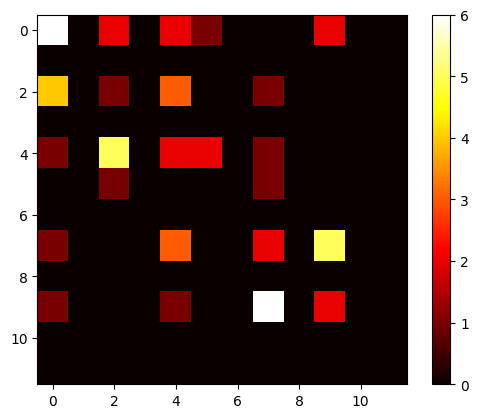

In [ ]:
tran_mat = pitch_class_transition_matrix(pitches)

print(tran_mat)
plt.imshow(pitch_class_transition_matrix(pitches), cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


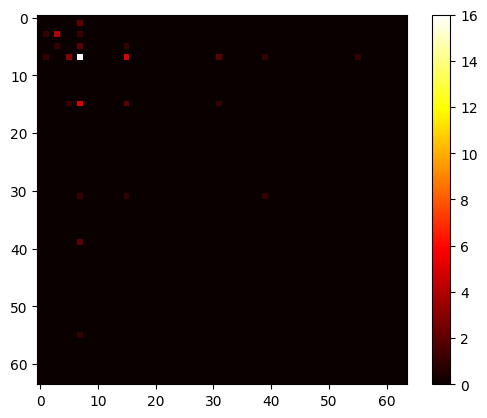

In [ ]:
tran_mat = note_length_transition_matrix(durations)

print(tran_mat)
plt.imshow(note_length_transition_matrix(durations), cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()